<a href="https://colab.research.google.com/github/felixlys/LSTM_Temperature_Prediction/blob/main/Sydney_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

file_path = 'sydney temp.xlsx'
df = pd.read_excel(file_path, usecols='C', nrows=588, names=['Temperature'])

fig = px.line(df, x=df.index, y='Temperature', title='Sydney Temperature')
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Temperature')

fig.show()


FileNotFoundError: [Errno 2] No such file or directory: 'sydney temp.xlsx'

In [ ]:
#menormalkan data
def normalize(data):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    return (data - data_mean) / data_std
def min_max_scaling(data):
    data_min = data.min(axis=0)
    data_max = data.max(axis=0)
    return (data - data_min) / (data_max - data_min)

dfnorm=min_max_scaling(df)

In [ ]:
print(df.min(axis=0))

Temperature    10.6
dtype: float64


In [ ]:
#potong data
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(dfnorm, test_size=0.5, random_state=42,shuffle=False)


In [ ]:
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        # Memisahkan input dan target
        a = dataset[i:(i + time_steps), 0]
        b = dataset[i + time_steps, 0]
        X.append(a)
        y.append(b)
    return np.array(X), np.array(y)

In [ ]:
time_steps = 10
#dataset untuk data 0-294
X_train, y_train = create_dataset(train_df.values, time_steps)
#dataset untuk data 294-end
X_test, y_test = create_dataset(test_df.values, time_steps)

print(X_test)

[[0.11034483 0.14137931 0.28965517 ... 0.83448276 0.7862069  0.63793103]
 [0.14137931 0.28965517 0.50344828 ... 0.7862069  0.63793103 0.36206897]
 [0.28965517 0.50344828 0.62068966 ... 0.63793103 0.36206897 0.12758621]
 ...
 [0.82068966 0.93448276 0.84482759 ... 0.19310345 0.35172414 0.52758621]
 [0.93448276 0.84482759 0.81724138 ... 0.35172414 0.52758621 0.51034483]
 [0.84482759 0.81724138 0.5862069  ... 0.52758621 0.51034483 0.84482759]]


In [ ]:
#reshape agar jadi vektor
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train)

[[[0.75172414]
  [0.76896552]
  [0.70689655]
  ...
  [0.08275862]
  [0.25172414]
  [0.54137931]]

 [[0.76896552]
  [0.70689655]
  [0.52068966]
  ...
  [0.25172414]
  [0.54137931]
  [0.60344828]]

 [[0.70689655]
  [0.52068966]
  [0.22758621]
  ...
  [0.54137931]
  [0.60344828]
  [0.7137931 ]]

 ...

 [[0.15862069]
  [0.07241379]
  [0.21034483]
  ...
  [0.84827586]
  [0.73793103]
  [0.78275862]]

 [[0.07241379]
  [0.21034483]
  [0.27586207]
  ...
  [0.73793103]
  [0.78275862]
  [0.55517241]]

 [[0.21034483]
  [0.27586207]
  [0.47586207]
  ...
  [0.78275862]
  [0.55517241]
  [0.36206897]]]


In [ ]:
#penyusunan LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
model = Sequential()
#inputnya vektor ukuran 5x1
model.add(LSTM(units=200, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=200, batch_size=32)

# Menguji model
y_pred = model.predict(X_test)

Epoch 1/200
9/9 [==============================] - 3s 20ms/step - loss: 0.2273
Epoch 2/200
9/9 [==============================] - 0s 20ms/step - loss: 0.1051
Epoch 3/200
9/9 [==============================] - 0s 39ms/step - loss: 0.0873
Epoch 4/200
9/9 [==============================] - 0s 38ms/step - loss: 0.0712
Epoch 5/200
9/9 [==============================] - 0s 20ms/step - loss: 0.0538
Epoch 6/200
9/9 [==============================] - 0s 21ms/step - loss: 0.0330
Epoch 7/200
9/9 [==============================] - 0s 22ms/step - loss: 0.0170
Epoch 8/200
9/9 [==============================] - 0s 19ms/step - loss: 0.0117
Epoch 9/200
9/9 [==============================] - 0s 20ms/step - loss: 0.0114
Epoch 10/200
9/9 [==============================] - 0s 21ms/step - loss: 0.0099
Epoch 11/200
9/9 [==============================] - 0s 20ms/step - loss: 0.0105
Epoch 12/200
9/9 [==============================] - 0s 23ms/step - loss: 0.0091
Epoch 13/200
9/9 [==============================]

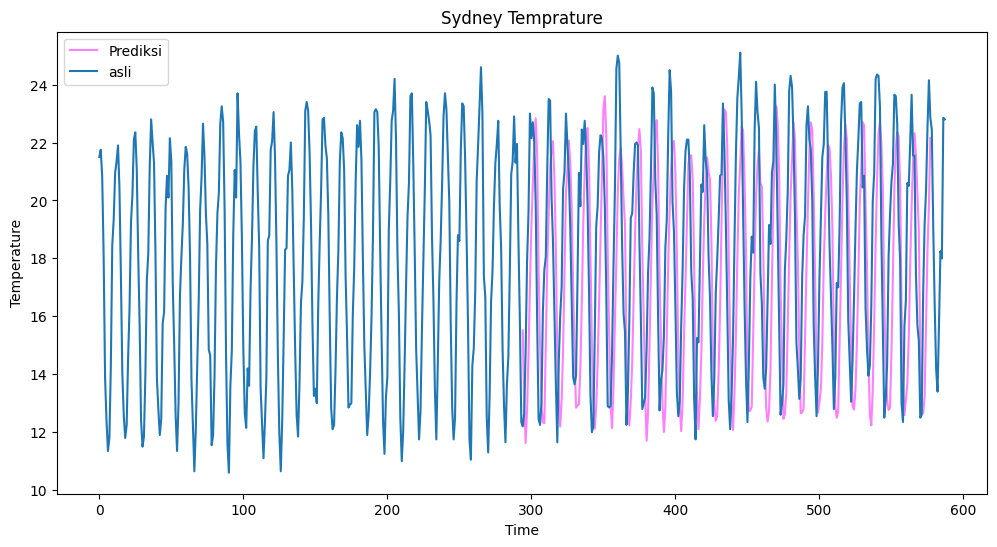

In [ ]:
y_pred_original_scale = y_pred * (df['Temperature'].max()-df['Temperature'].min()) + df['Temperature'].min()


#plot
plt.figure(figsize=(12, 6))
shifted_index = range(294, 294 + len(y_test_original_scale))
plt.plot(shifted_index, y_pred_original_scale, label='Prediksi',color='magenta',alpha=0.5)

plt.plot(df,label="asli")
plt.legend()
plt.title('Sydney Temprature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()


In [ ]:
print(X_test)

[[0.11034483 0.14137931 0.28965517 ... 0.83448276 0.7862069  0.63793103]
 [0.14137931 0.28965517 0.50344828 ... 0.7862069  0.63793103 0.36206897]
 [0.28965517 0.50344828 0.62068966 ... 0.63793103 0.36206897 0.12758621]
 ...
 [0.82068966 0.93448276 0.84482759 ... 0.19310345 0.35172414 0.52758621]
 [0.93448276 0.84482759 0.81724138 ... 0.35172414 0.52758621 0.51034483]
 [0.84482759 0.81724138 0.5862069  ... 0.52758621 0.51034483 0.84482759]]


In [ ]:
print(dfnorm.to_string())


     Temperature
0       0.751724
1       0.768966
2       0.706897
3       0.520690
4       0.227586
5       0.124138
6       0.051724
7       0.082759
8       0.251724
9       0.541379
10      0.603448
11      0.713793
12      0.741379
13      0.779310
14      0.675862
15      0.468966
16      0.234483
17      0.134483
18      0.082759
19      0.113793
20      0.272414
21      0.393103
22      0.596552
23      0.662069
24      0.793103
25      0.810345
26      0.724138
27      0.520690
28      0.351724
29      0.124138
30      0.062069
31      0.086207
32      0.234483
33      0.458621
34      0.520690
35      0.727586
36      0.841379
37      0.786207
38      0.737931
39      0.520690
40      0.224138
41      0.151724
42      0.089655
43      0.127586
44      0.355172
45      0.382759
46      0.627586
47      0.706897
48      0.655172
49      0.796552
50      0.741379
51      0.448276
52      0.303448
53      0.134483
54      0.051724
55      0.165517
56      0.420690
57      0.5137